# Unsupervised Learning

In [1]:
from IPython.display import Image

Unsupervised learning involves learning with no labels. Therefore no target data exists.

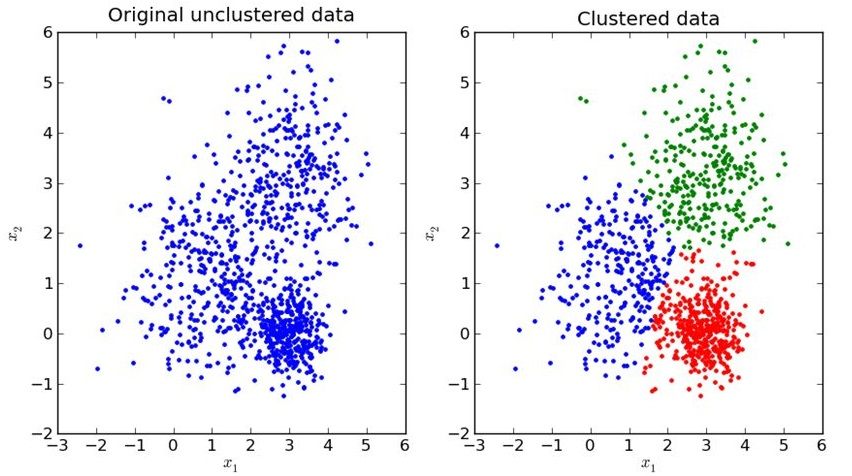

In [2]:
Image('usl-1.jpg')

## K-Means Clustering Algorithm

It's a **Prototype-based** clustering where each cluster is represented by a prototype.

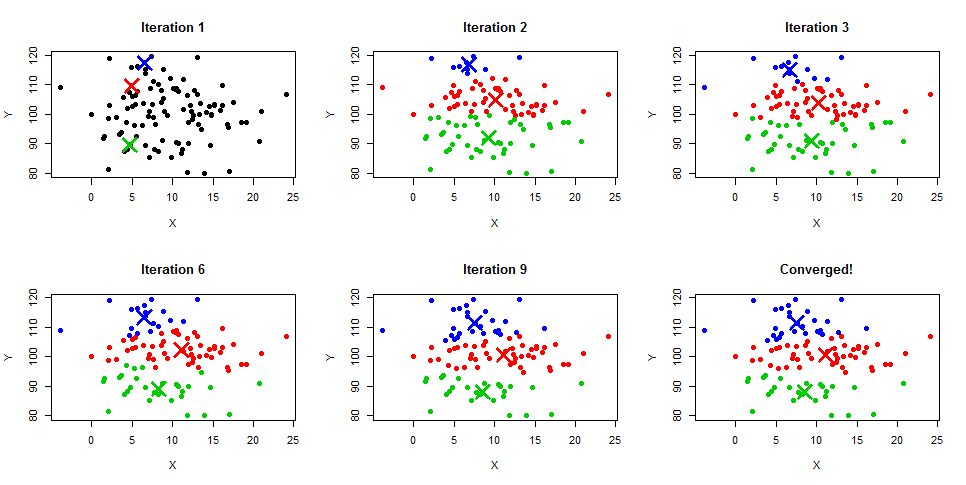

In [3]:
Image('kmc-1.png')

1) Randomly initialize **k** cluster centroids $\mu_1,\mu_2,...,\mu_k \in \mathbb{R}^n$

2) Assign each sample to the nearest centroid $\mu^{(j)}, \ j \in \{1,...,k\}$

3) Move the centroids to the center of the samples that were assigned to it.

4) Repeat the steps $2$ and $3$ until the cluster assignment do not change or a user-defined   tolerance or a maximum number of iterations is reached.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X,Y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

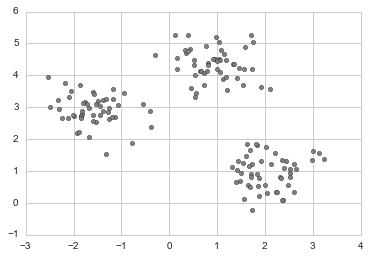

In [7]:
plt.scatter(X[:,0],X[:,1],c='gray')

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3,n_init=10,max_iter=300,tol=1e-04,init='random')

In [10]:
y_km = km.fit_predict(X)

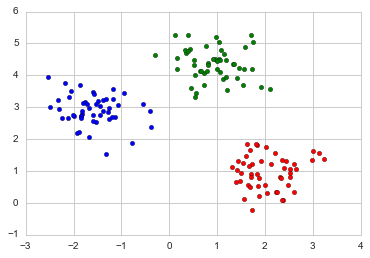

In [11]:
cl = ['blue','red','green']
for i in range(3):
    plt.scatter(X[:,0][y_km==i],X[:,1][y_km==i],c=cl[i])

$$SSE = \sum_{i=1}^n \sum_{j=1}^k w^{(i,j)} \| x^{(i)} - \mu^{(j)} \|_2^2  $$

$\mu^{(j)}$ - centroid for cluster $j$

$w^{(i,j)}$ = $1$ if the sample $x^{(j)}$ is in cluster,

$ \ \ \ \ \ \ \ \  $ = $0$ otherwise

### Choosing number of cluster centroids

Ofcourse it is manually choosen if we have good knowledge of data. Otherwise we use **Elbow** method which is plotted between no.of.clusters and Cost.

#### Cost

$$J(C^{(1)},....,C^{(m)},\mu_1,.....,\mu_k) = \frac{1}{m} \sum_{i=1}^m \|x^{(i)} - \mu_c^{(i)} \|^2 $$

We choose the cluster number where there is no notable difference is observed further (elbow).

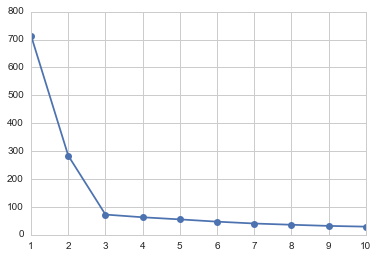

In [12]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')

So here $no.of.centroids = 3$ for best results